In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , r2_score

In [20]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [2]:
## Data load

df = pd.read_csv("car data.csv")

In [5]:
df.head(5)


,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [6]:
df.shape

(301, 9)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [12]:
df.isnull().sum().sum()

0

In [16]:
## checking distribution of categorical data
print(df["Fuel_Type"].value_counts())

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64


In [17]:
print(df["Seller_Type"].value_counts())

Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64


In [18]:
print(df["Transmission"].value_counts())

Transmission
Manual       261
Automatic     40
Name: count, dtype: int64


In [39]:
## data encoding 
encoder = OneHotEncoder(drop='first',sparse_output=False,dtype=np.int64)
encoder.fit(df[["Fuel_Type"]])
df["Fuel_Type"] = encoder.fit_transform(df[["Fuel_Type"]])
df["Seller_Type"] = encoder.fit_transform(df[["Seller_Type"]])
df["Transmission"] = encoder.fit_transform(df[["Transmission"]])


In [44]:
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,1,0
1,sx4,2013,4.75,9.54,43000,1,0,1,0
2,ciaz,2017,7.25,9.85,6900,0,0,1,0
3,wagon r,2011,2.85,4.15,5200,0,0,1,0
4,swift,2014,4.60,6.87,42450,1,0,1,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,1,0,1,0
297,brio,2015,4.00,5.90,60000,0,0,1,0
298,city,2009,3.35,11.00,87934,0,0,1,0
299,city,2017,11.50,12.50,9000,1,0,1,0


In [46]:
df = df.drop(columns=["Car_Name"])

In [50]:
## correlation matrix
corr_matrix = df.corr()

<Axes: >

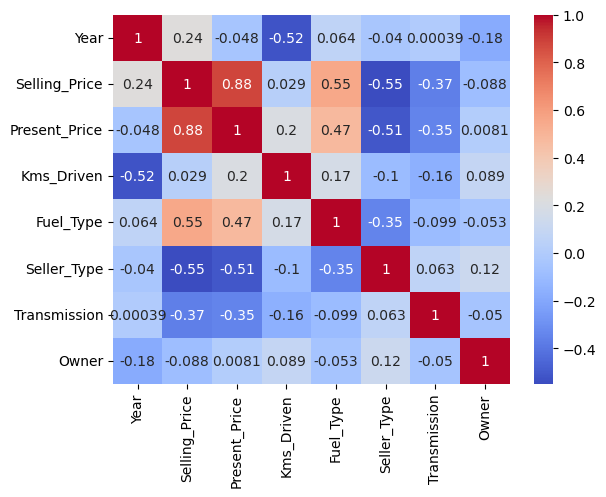

In [52]:
plt.Figure(figsize=(8,5))
sns.heatmap(corr_matrix,cmap="coolwarm",annot=True)

In [56]:
X = df.drop("Selling_Price" , axis=1)
y = df["Selling_Price"]

In [57]:
## train test split

X_train  , X_test , y_train , y_test =train_test_split(X , y ,test_size=0.2,random_state=42)

In [58]:
print(X_train.shape , X_test.shape , y_train.shape , y_test.shape)

(240, 7) (61, 7) (240,) (61,)


In [59]:
model = LinearRegression()

model.fit(X_train,y_train)

LinearRegression()

In [60]:
y_pred = model.predict(X_test)

In [62]:
print("Mean Squared Error : " ,mean_squared_error(y_test , y_pred))
print("R2 Score : " ,r2_score(y_test , y_pred))

Mean Squared Error :  3.470308093483273
R2 Score :  0.8493501178393563


In [63]:

y_pred = model.predict(X_train)

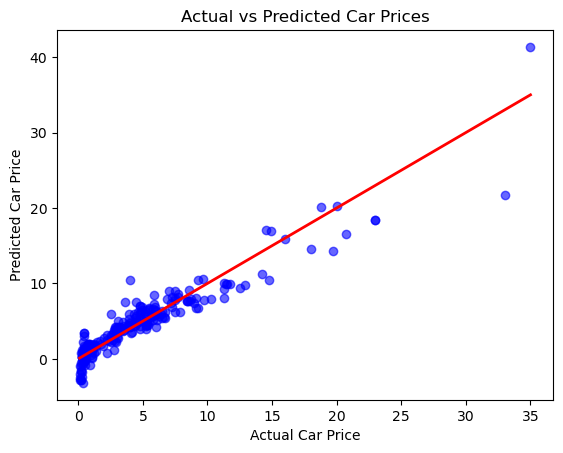

In [70]:
plt.scatter(y_train, y_pred, color='blue', alpha=0.6)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], color='red', lw=2)

plt.xlabel("Actual Car Price")
plt.ylabel("Predicted Car Price")
plt.title("Actual vs Predicted Car Prices")
# plt.grid(True)
plt.show()

## Thank you